# Generate Samples

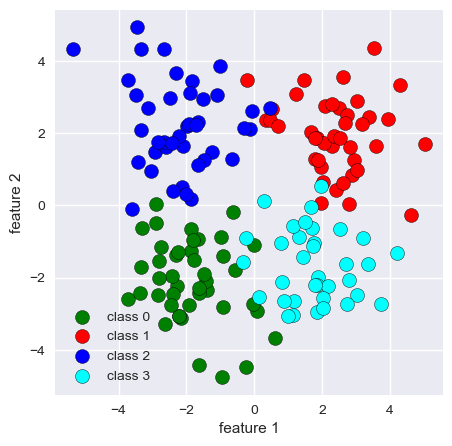

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')


X, y = make_blobs(n_samples = 200, n_features = 2, centers= [(-2,-2), (2,2), (-2,2), (2,-2)],cluster_std = 1.2, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.style.use('seaborn')
plt.figure(figsize = (5,5))
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], c= "green", marker= 'o',s=100,edgecolors='black')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], c= "red", marker= 'o',s=100,edgecolors='black')
plt.scatter(X_train[y_train==2,0], X_train[y_train==2,1], c= "blue", marker= 'o',s=100,edgecolors='black')
plt.scatter(X_train[y_train==3,0], X_train[y_train==3,1], c= "cyan", marker= 'o',s=100,edgecolors='black')
plt.legend(["class 0","class 1","class 2",'class 3'])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

# Perform cross-validation to choose value of k

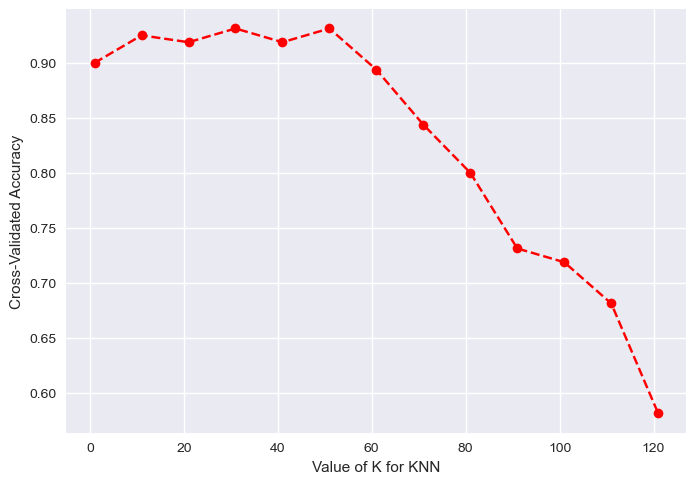

In [2]:
k_range = range(1, 130,10)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores,'ro--')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Check accuracy on test samples for the chosen k

In [3]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,y_train)
acc = knn.score(X_test, y_test)
print(f"the accuracy on the test dataset is: {acc:.2f}")

the accuracy on the test dataset is: 0.85


# Compare train, test and validation error

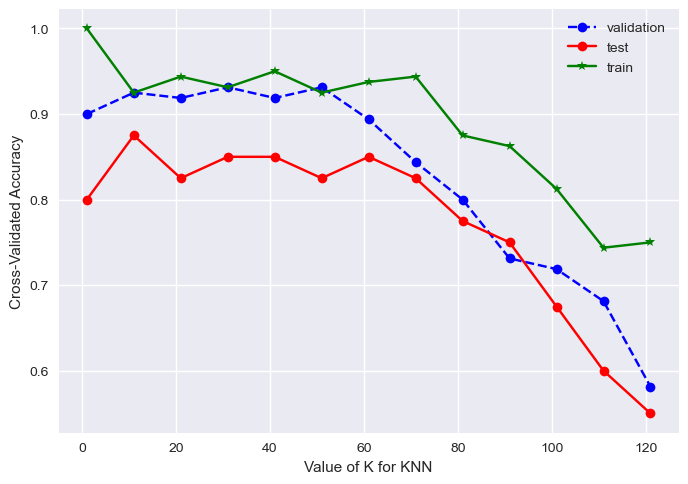

In [4]:
k_scores = []
test_scores = []
train_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    
    knn.fit(X_train,y_train)
    acc = knn.score(X_test, y_test)
    test_scores.append(acc)
    acc = knn.score(X_train, y_train)
    train_scores.append(acc)
    
# plot to see clearly
plt.plot(k_range, k_scores,'bo--',k_range, test_scores,'ro-',k_range, train_scores,'g*-')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(['validation','test','train'])
plt.show()